This is based on the Stoop task described here on openfMRI

[ds164](https://openfmri.org/dataset/ds000164/)

In [1]:
import re
import glob
import os

In [2]:
reg = re.compile('.*/ds164/sub-(?P<subj_idx>[0-9]+)/func/sub-[0-9]+_task-stroop_events\.tsv')

In [3]:
fns = glob.glob(os.path.join(os.environ['HOME'], 'data/openfmri/ds164/sub*/func/sub-*_task-stroop_events.tsv'))

In [4]:
import pandas

In [5]:
dfs = []

for fn in fns:
    d = reg.match(fn).groupdict()
    
    dfs.append(pandas.read_csv(fn, sep='\t', index_col=False,na_values=['n/a', 'junk']))
    dfs[-1]['subj_idx'] = d['subj_idx']
    
df = pandas.concat(dfs)

In [6]:
df.loc[df.condition == 'neutral=', 'condition'] = 'neutral'

In [7]:
import seaborn as sns
%matplotlib inline

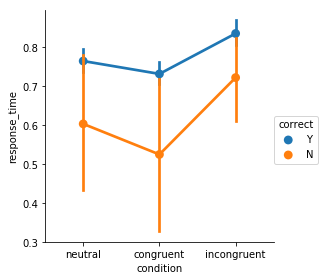

In [8]:
sns.factorplot('condition', 'response_time', 'correct', data=df, units='subj_idx')

In [9]:
df['rt'] = df['response_time']
df['response'] = df.correct.map({'Y':1, 'N':0})

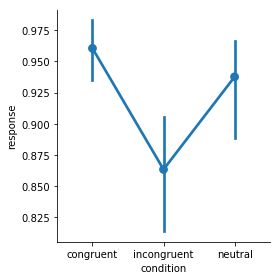

In [10]:
correct = df.groupby(['subj_idx', 'condition']).response.mean()

sns.factorplot('condition', 'response', data=correct.reset_index(), ci=100)

In [11]:
import hddm

/home/ubuntu/miniconda2/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


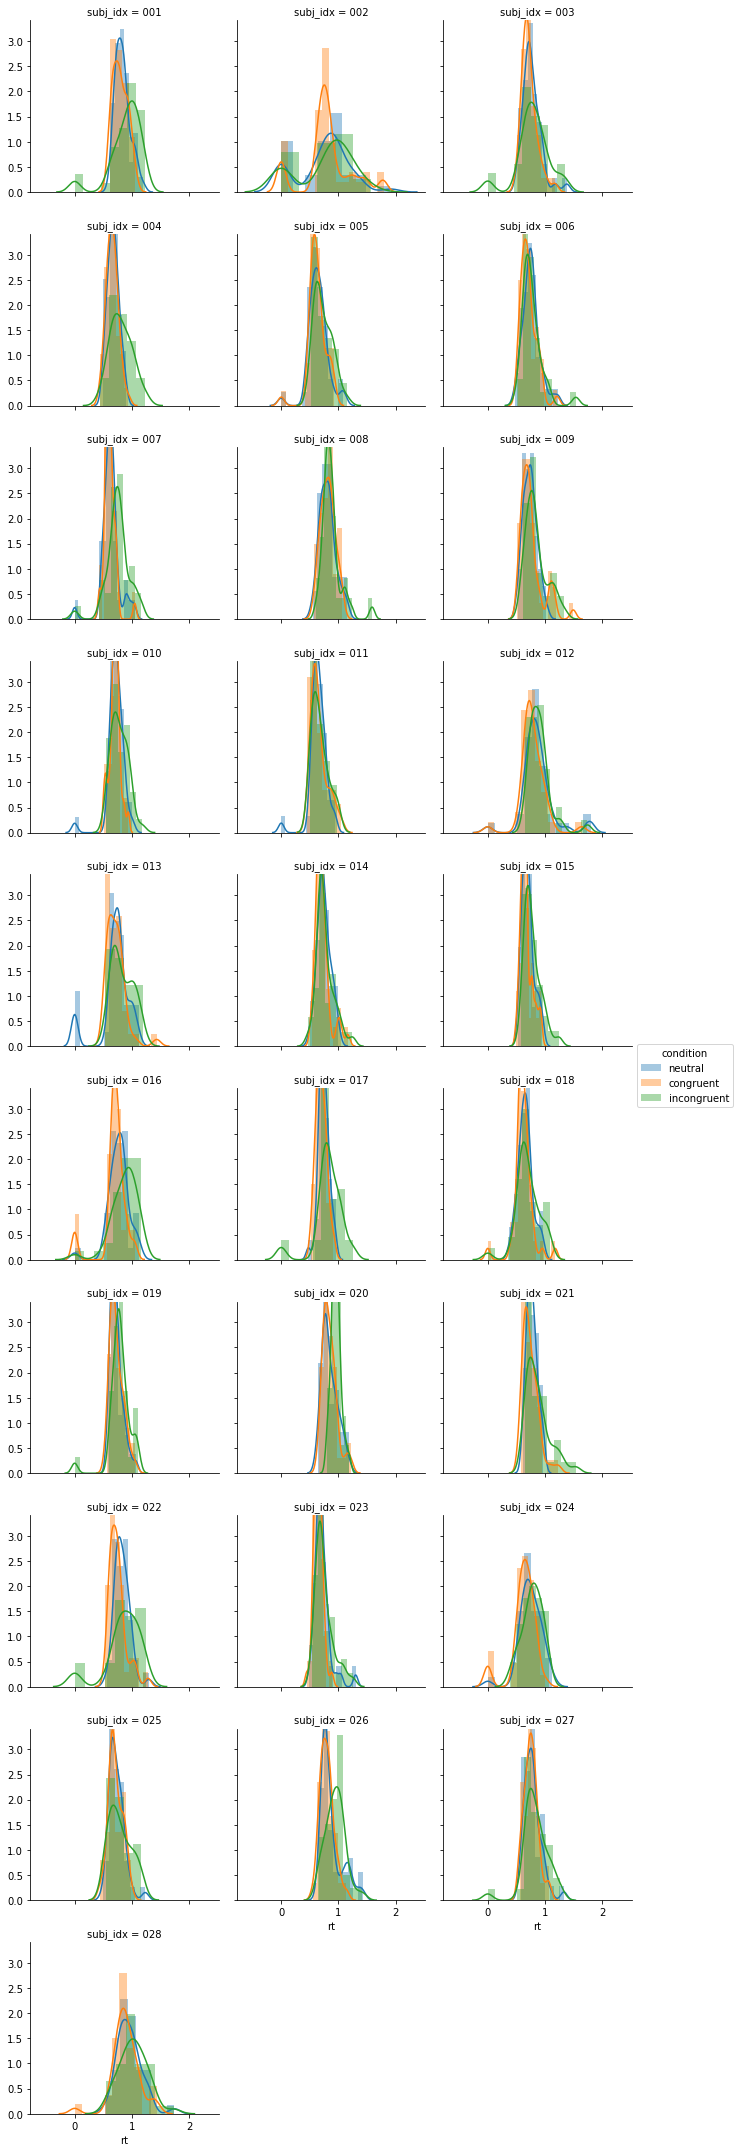

In [12]:
fac = sns.FacetGrid(df, hue='condition', col='subj_idx', col_wrap=3)
fac.map(sns.distplot, 'rt').add_legend()

In [13]:
print(df.shape)
df = df[df.rt > 0]
print(df.shape)

(3337, 8)
(3279, 8)


# Drift

In [28]:
model = hddm.HDDM(df, depends_on={'v':'condition'})
model.sample(1000, 500)

 [-----------------100%-----------------] 1001 of 1000 complete in 69.9 sec

Plotting a
Plotting a_std
Plotting v(congruent)
Plotting v(incongruent)
Plotting v(neutral)
Plotting v_std
Plotting t
Plotting t_std


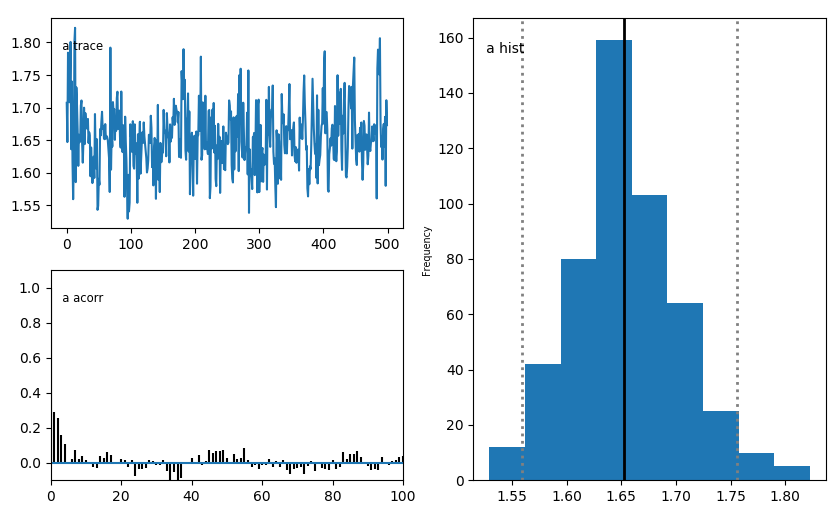

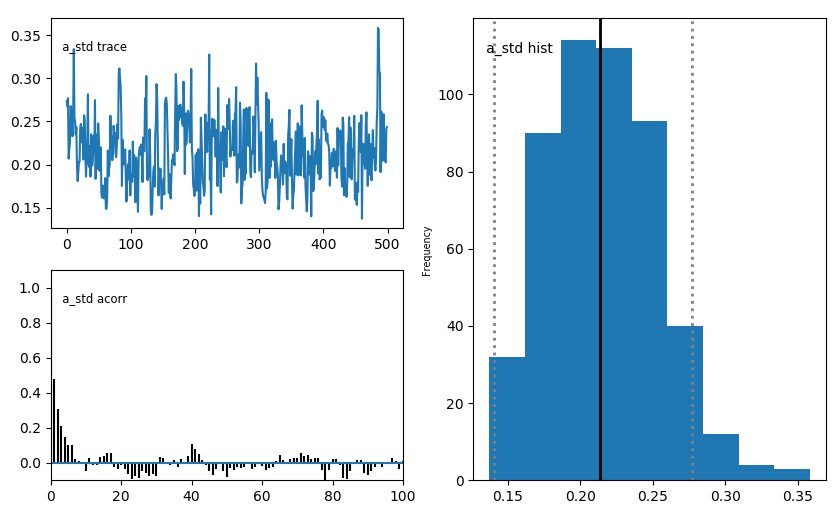

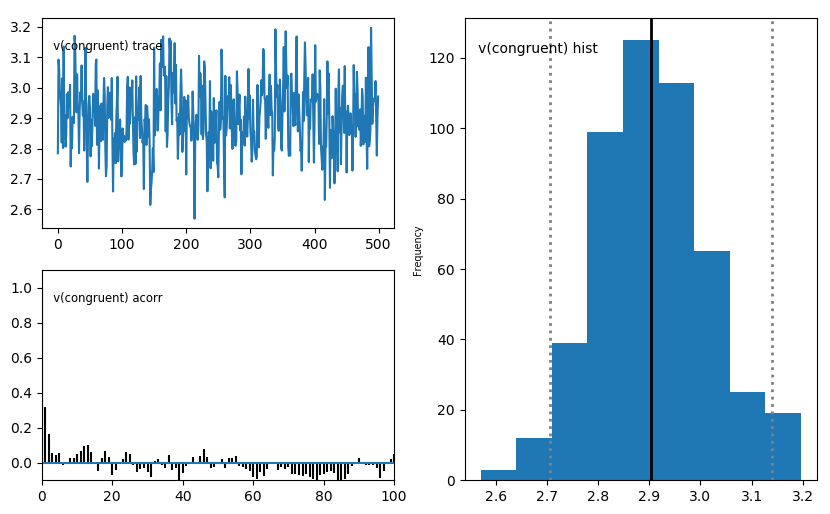

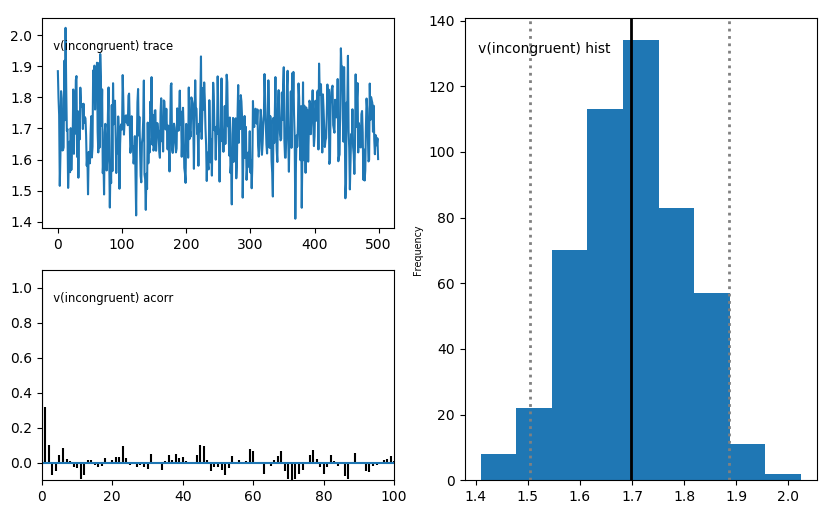

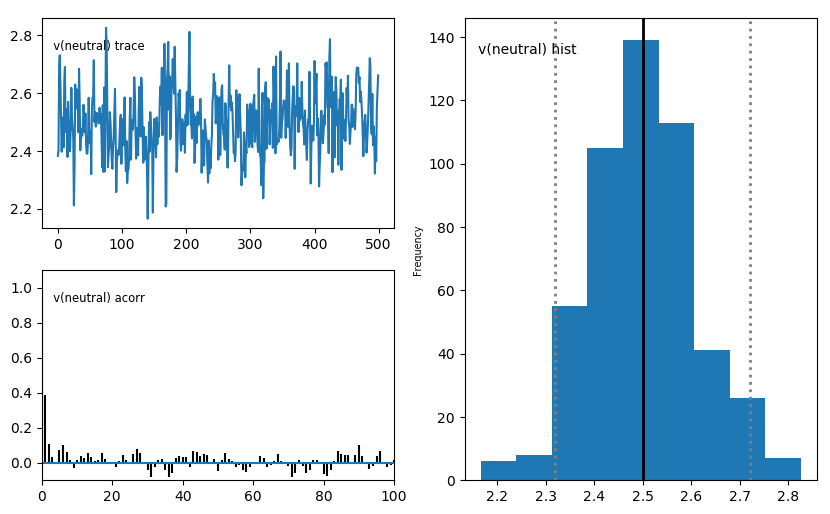

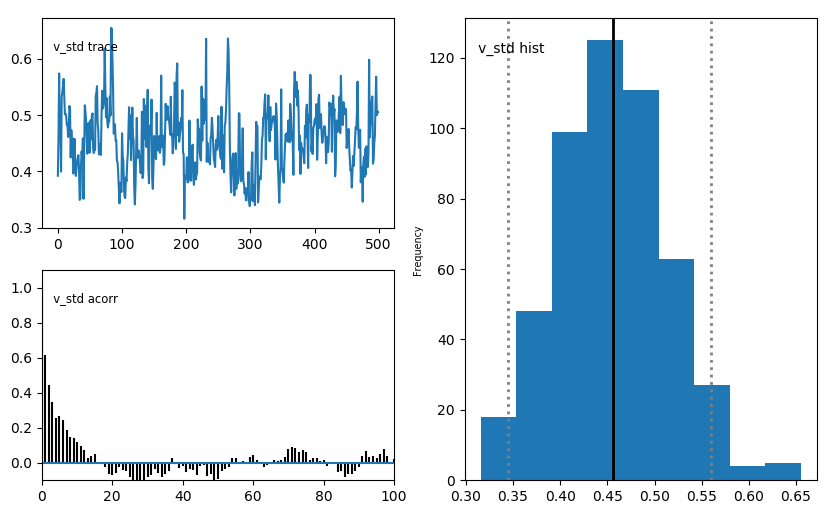

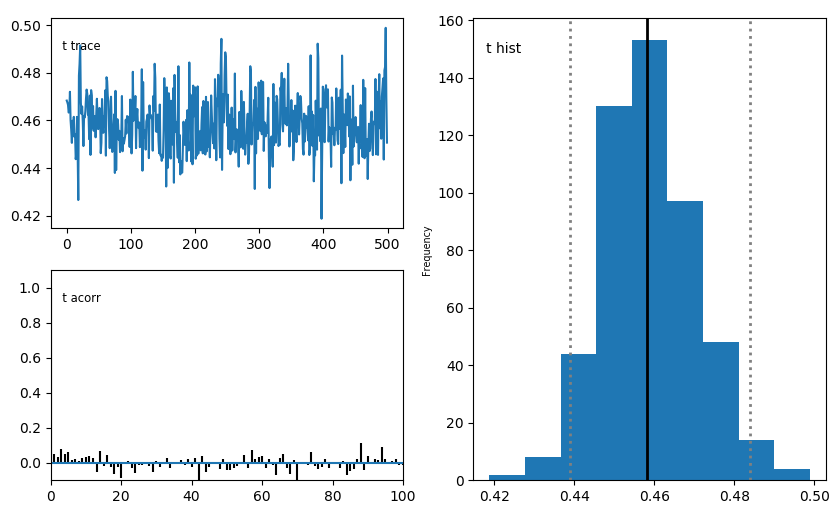

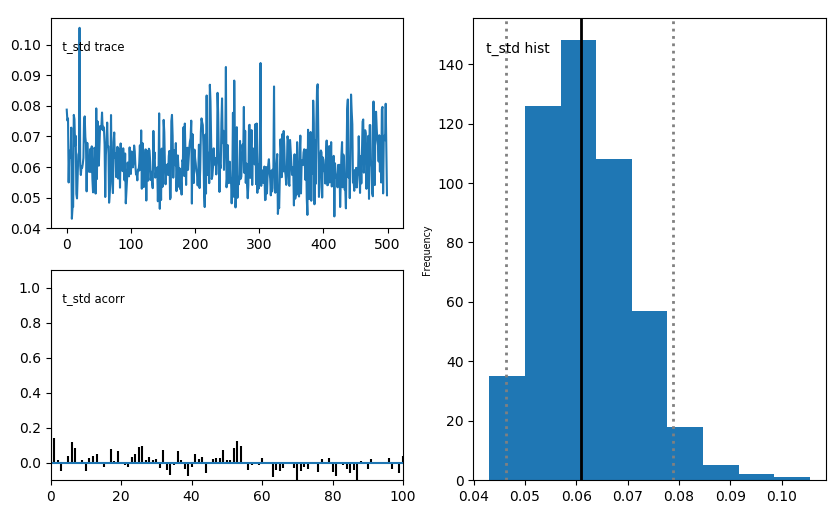

In [30]:
model.plot_posteriors()

In [31]:
subj_nodes = model.get_subj_nodes()
subj_nodes = subj_nodes[subj_nodes.knode_name == 'v_subj']
tmp = subj_nodes[['subj_idx', 'tag', 'node', 'mean']]
tmp['mean'] = tmp.node.apply(lambda x: x.trace[:].mean())
tmp['tag'] = tmp.tag.apply(lambda x: x[0])
# tmp.rename(columns={'mean':'z'})

/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
tmp.to_csv('stroop_v.csv')

# Start point

In [14]:
model = hddm.HDDM(df, depends_on={'z':'condition'}, include='z')

In [26]:
model.dic

-1725.4859273294937

In [15]:
model.find_starting_values()

/home/ubuntu/miniconda2/lib/python2.7/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/ubuntu/miniconda2/lib/python2.7/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


In [16]:
model.sample(1000, 500)

/home/ubuntu/miniconda2/lib/python2.7/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 102.0 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(congruent)
Plotting z(incongruent)
Plotting z(neutral)
Plotting z_std


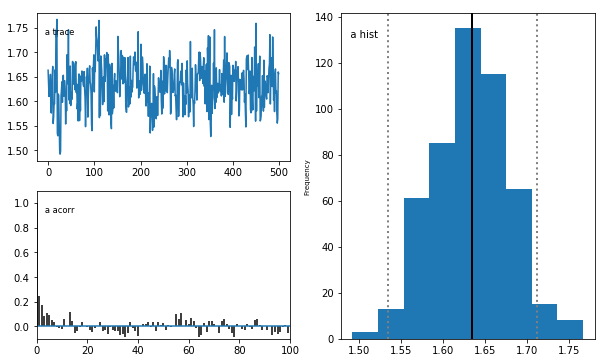

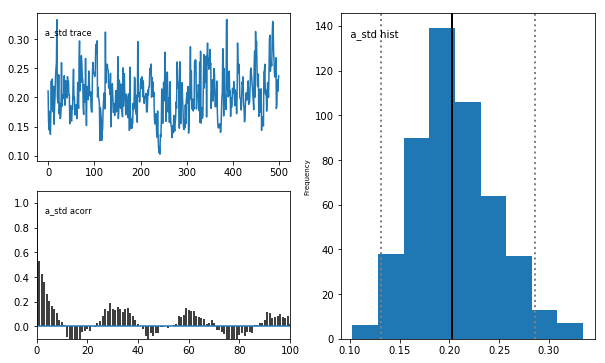

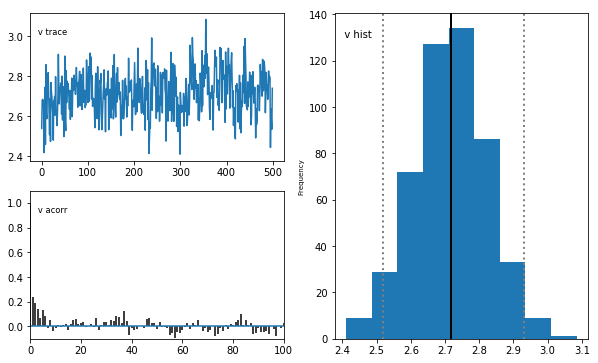

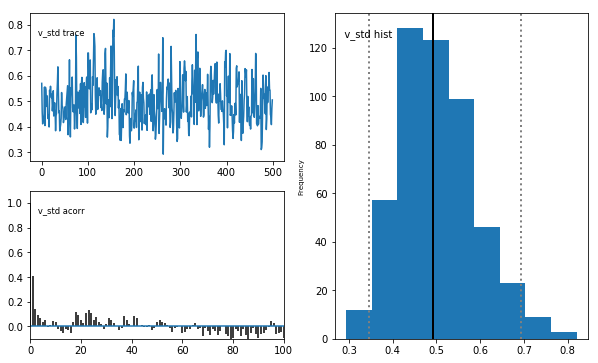

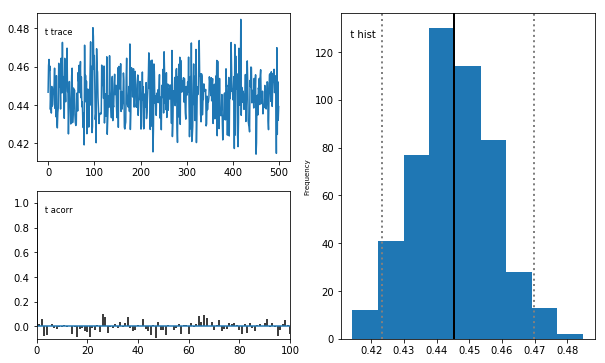

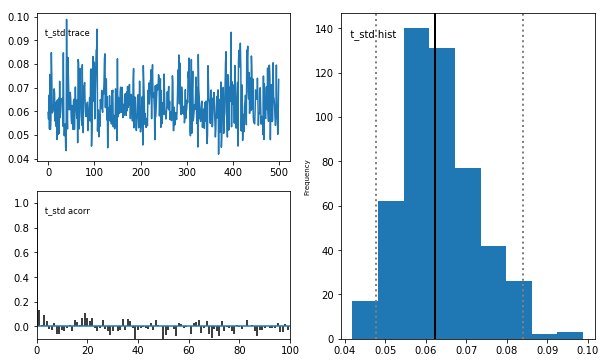

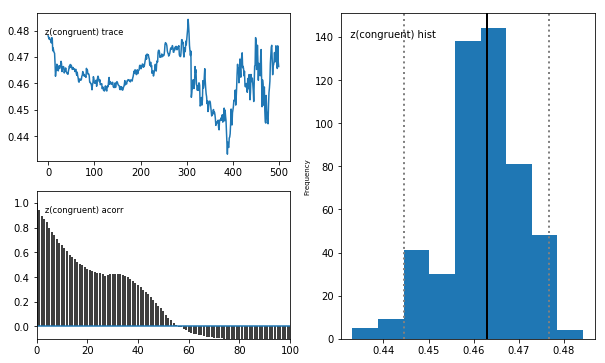

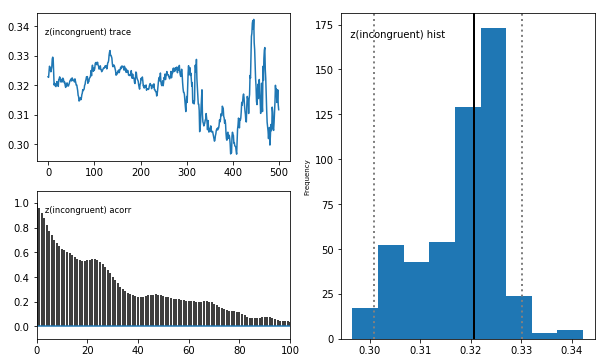

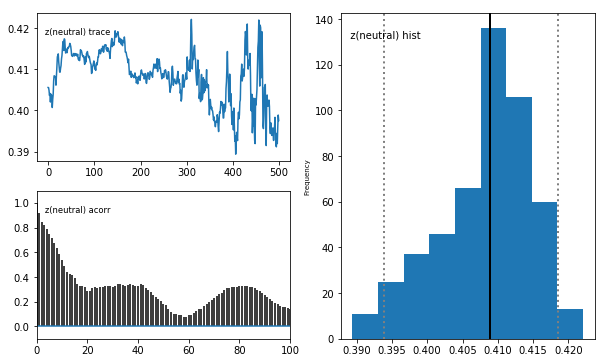

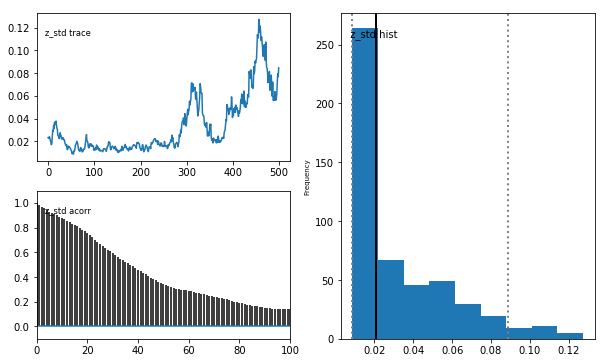

In [17]:
model.plot_posteriors()

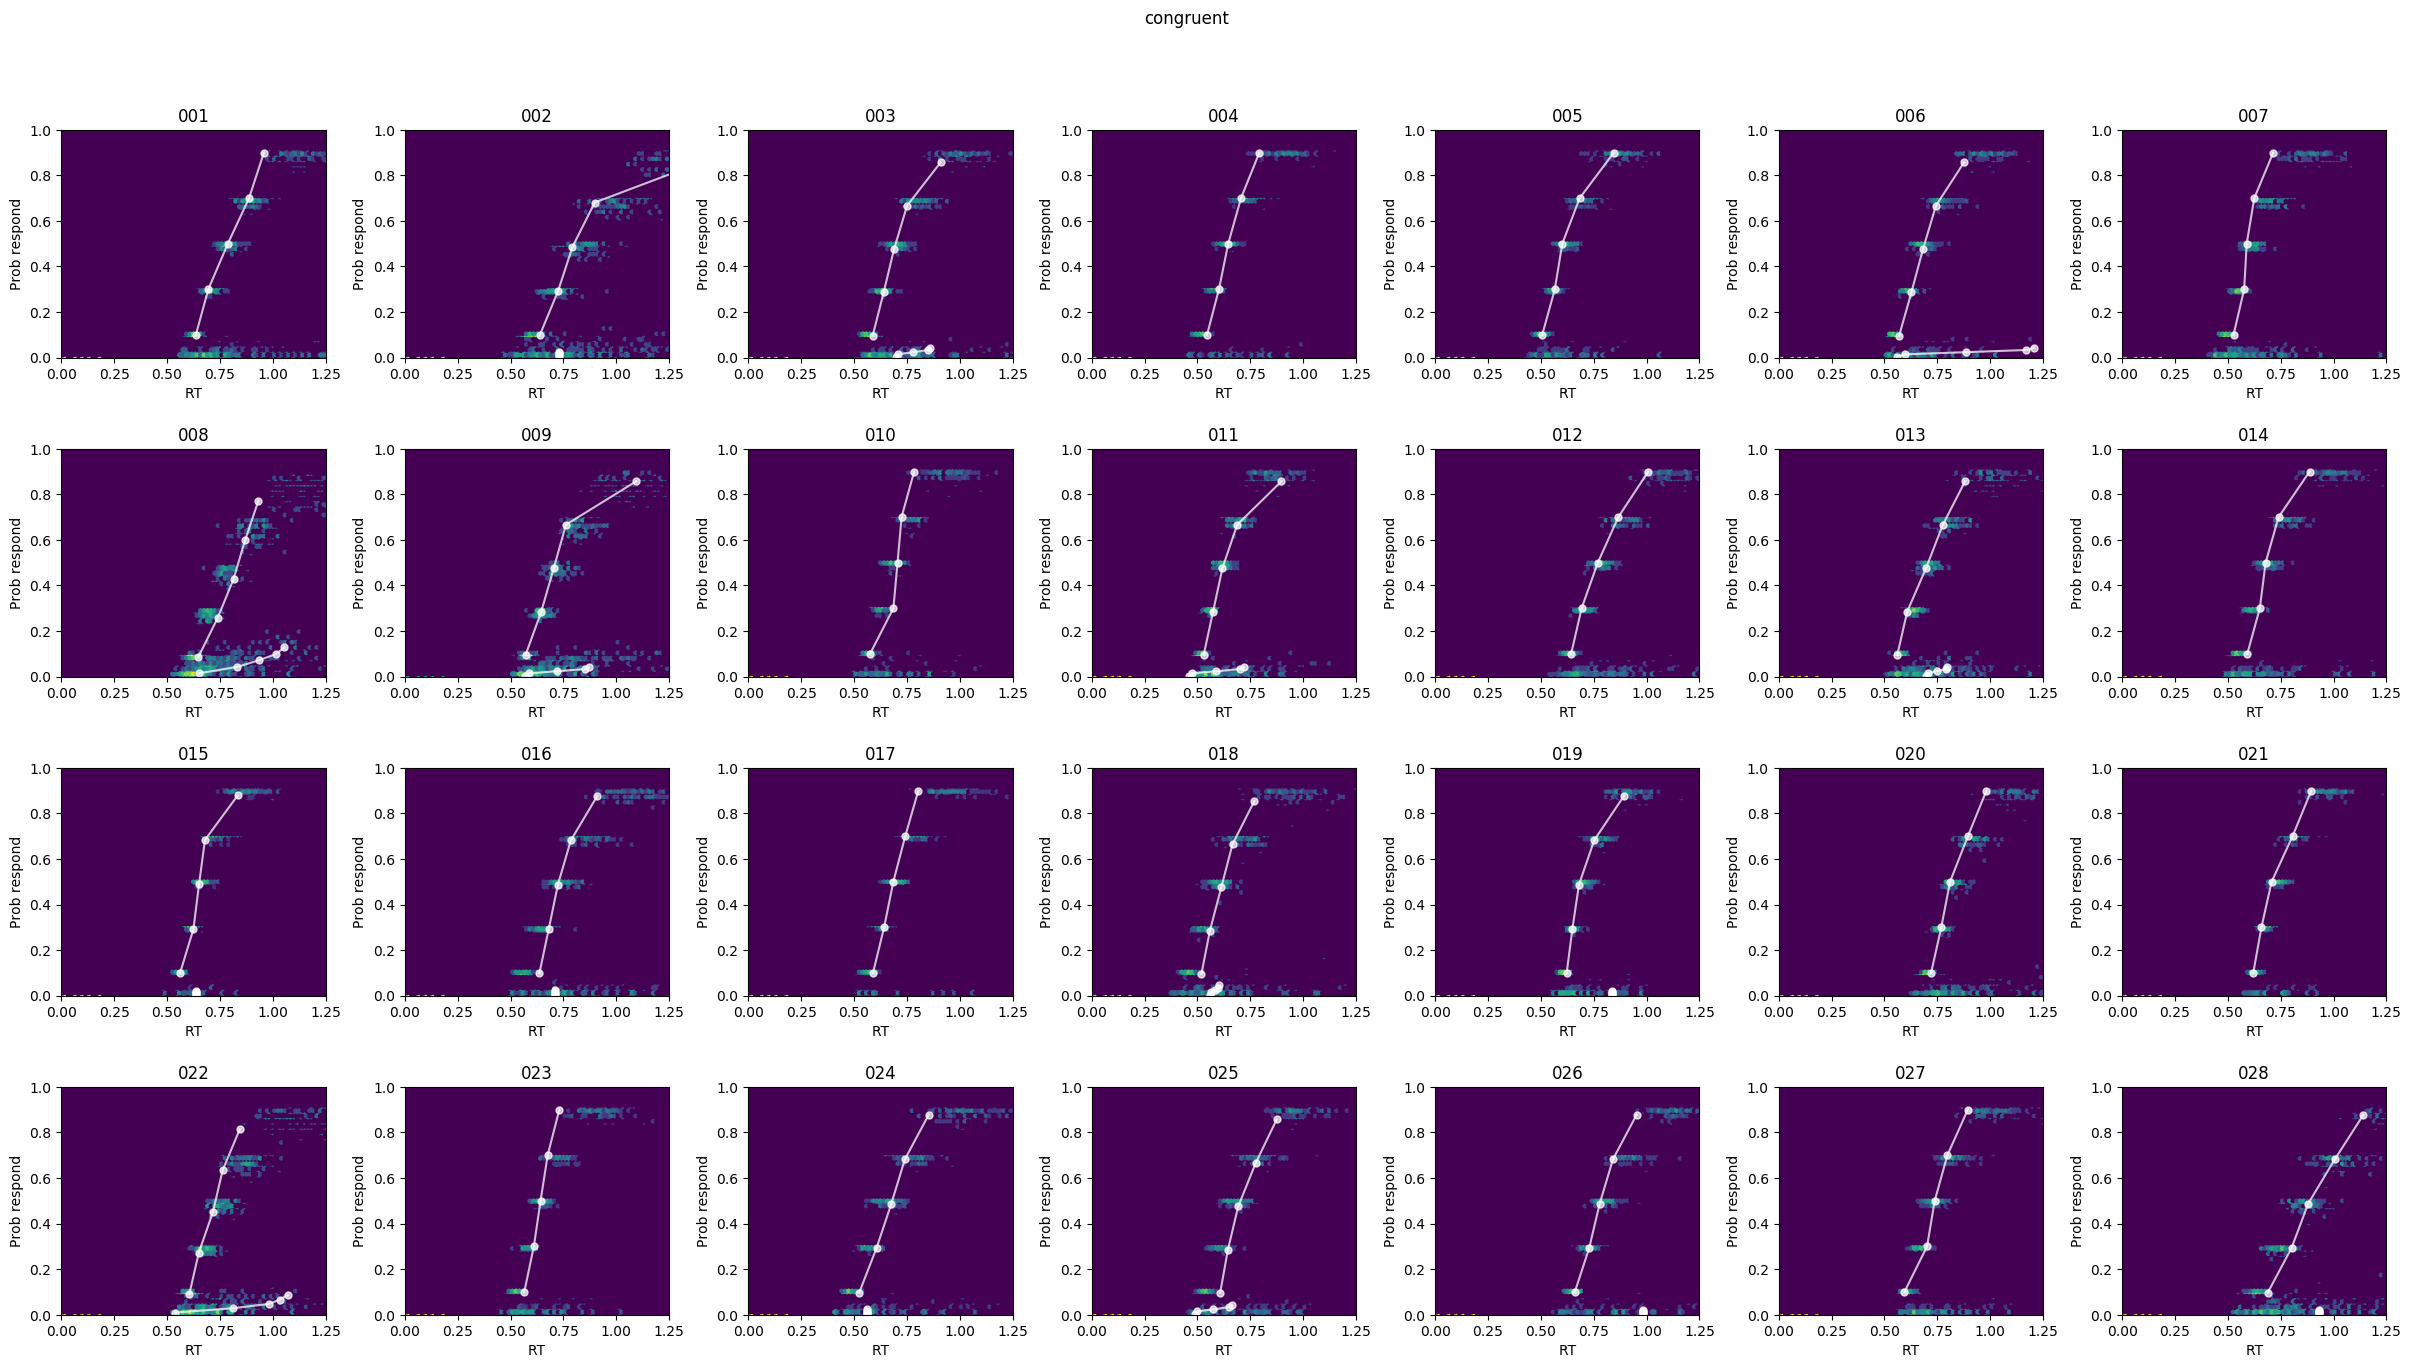

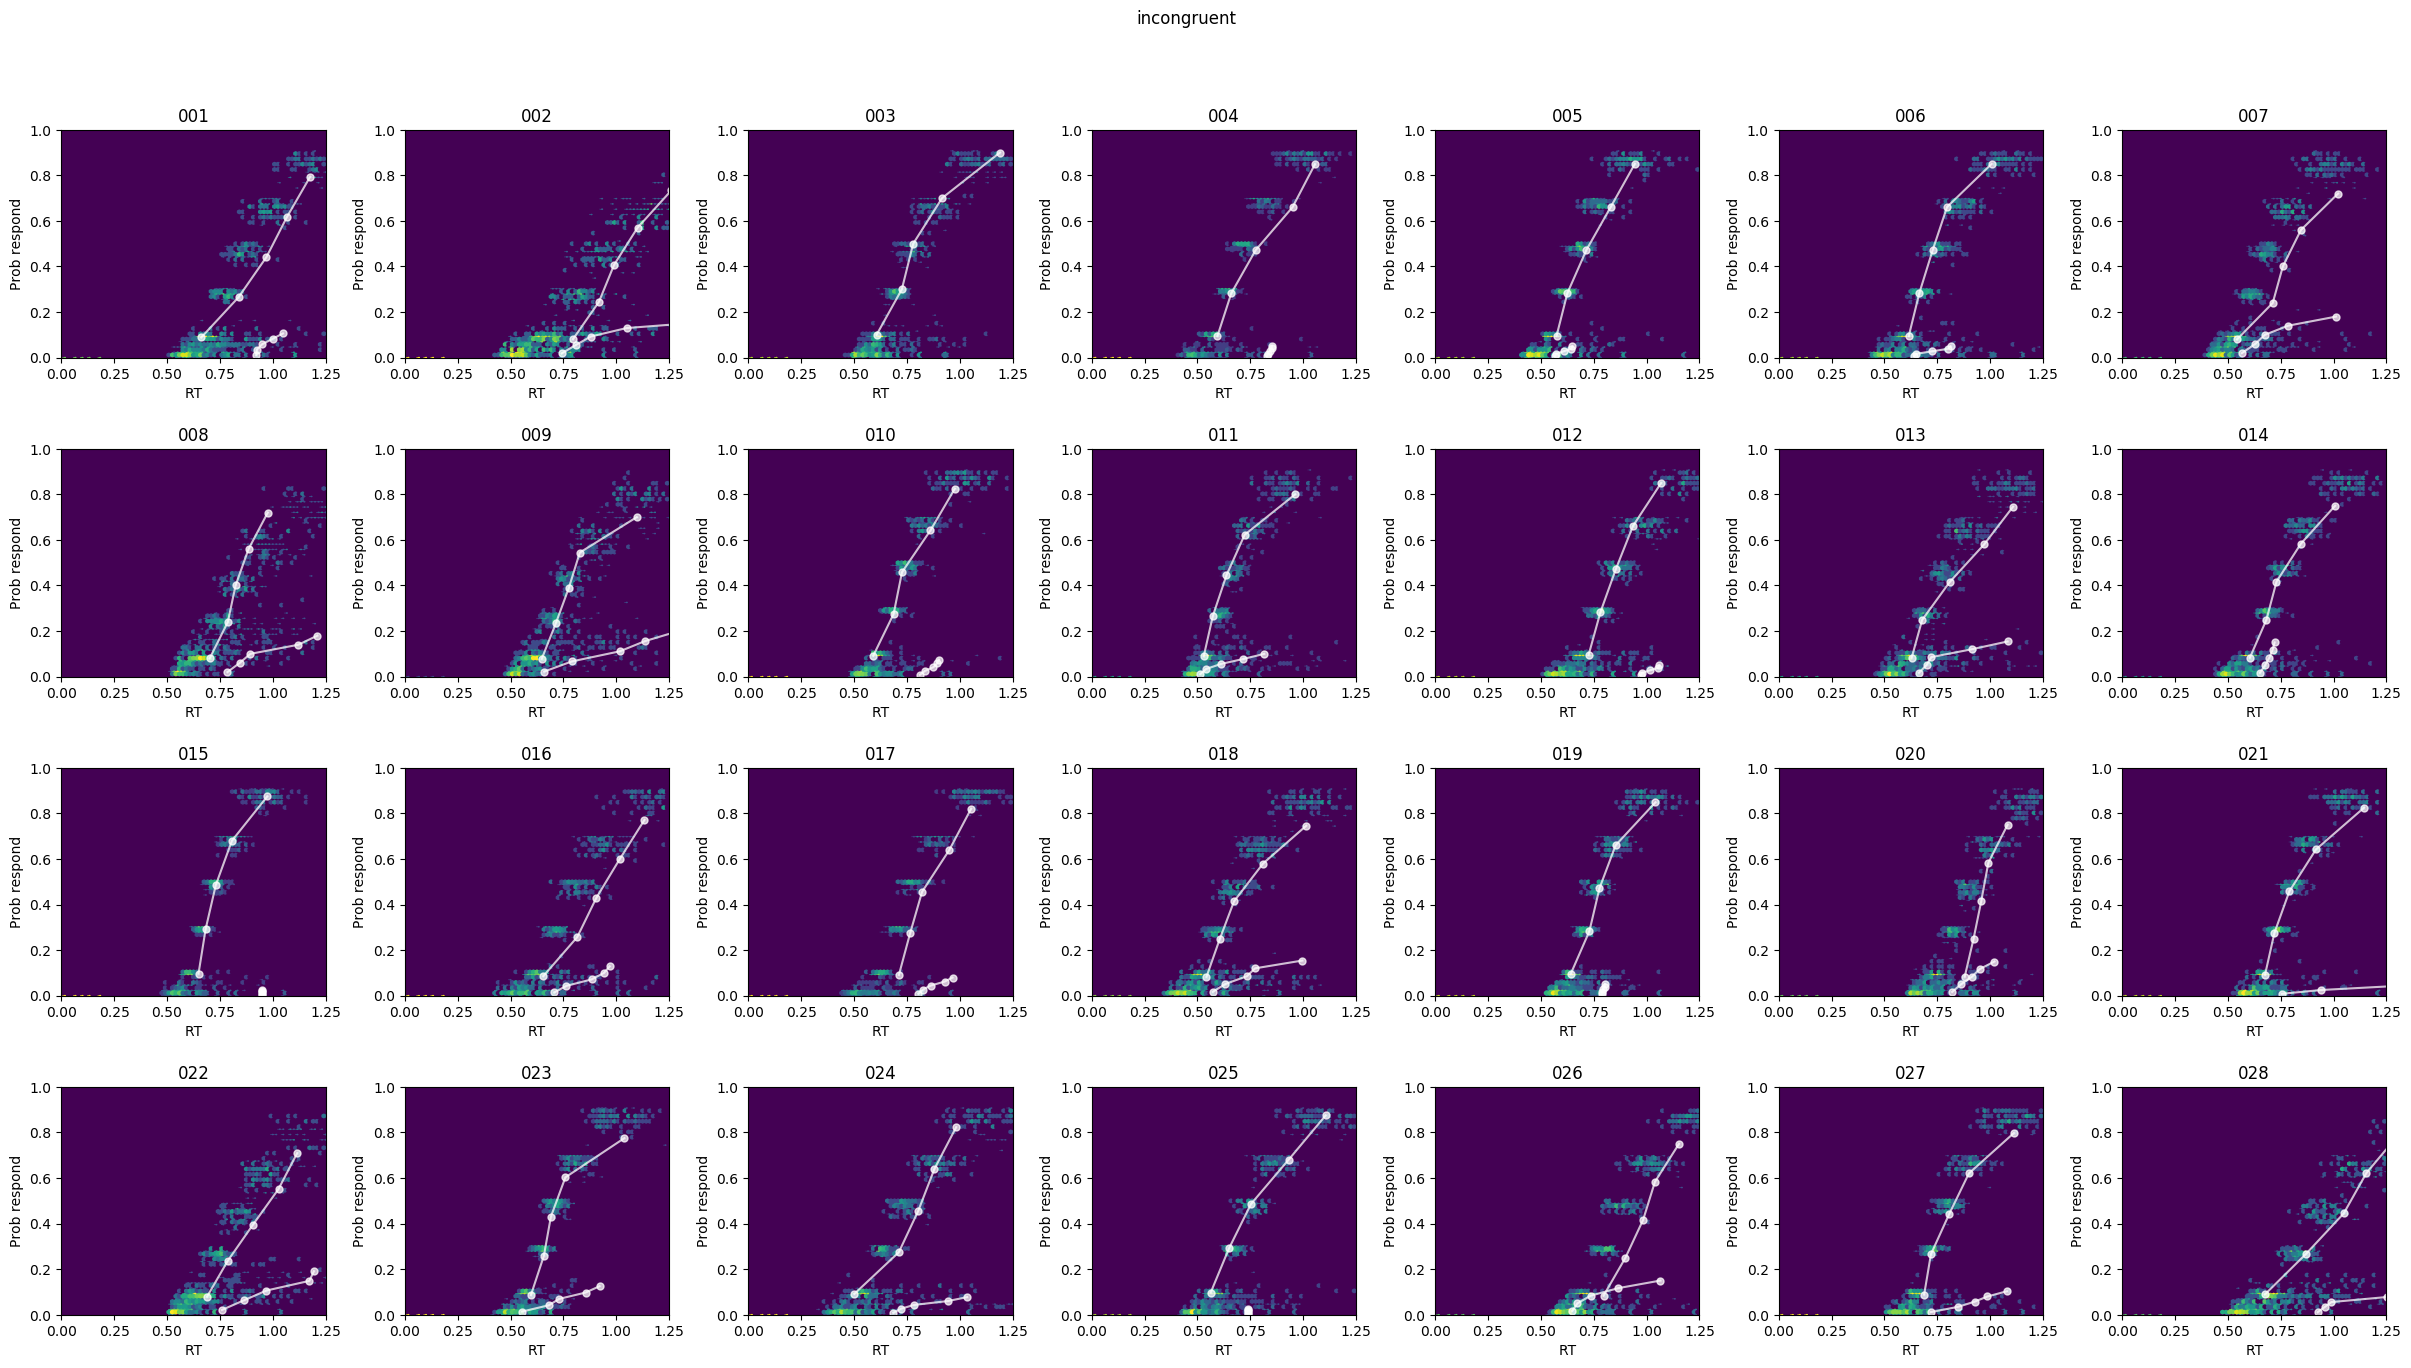

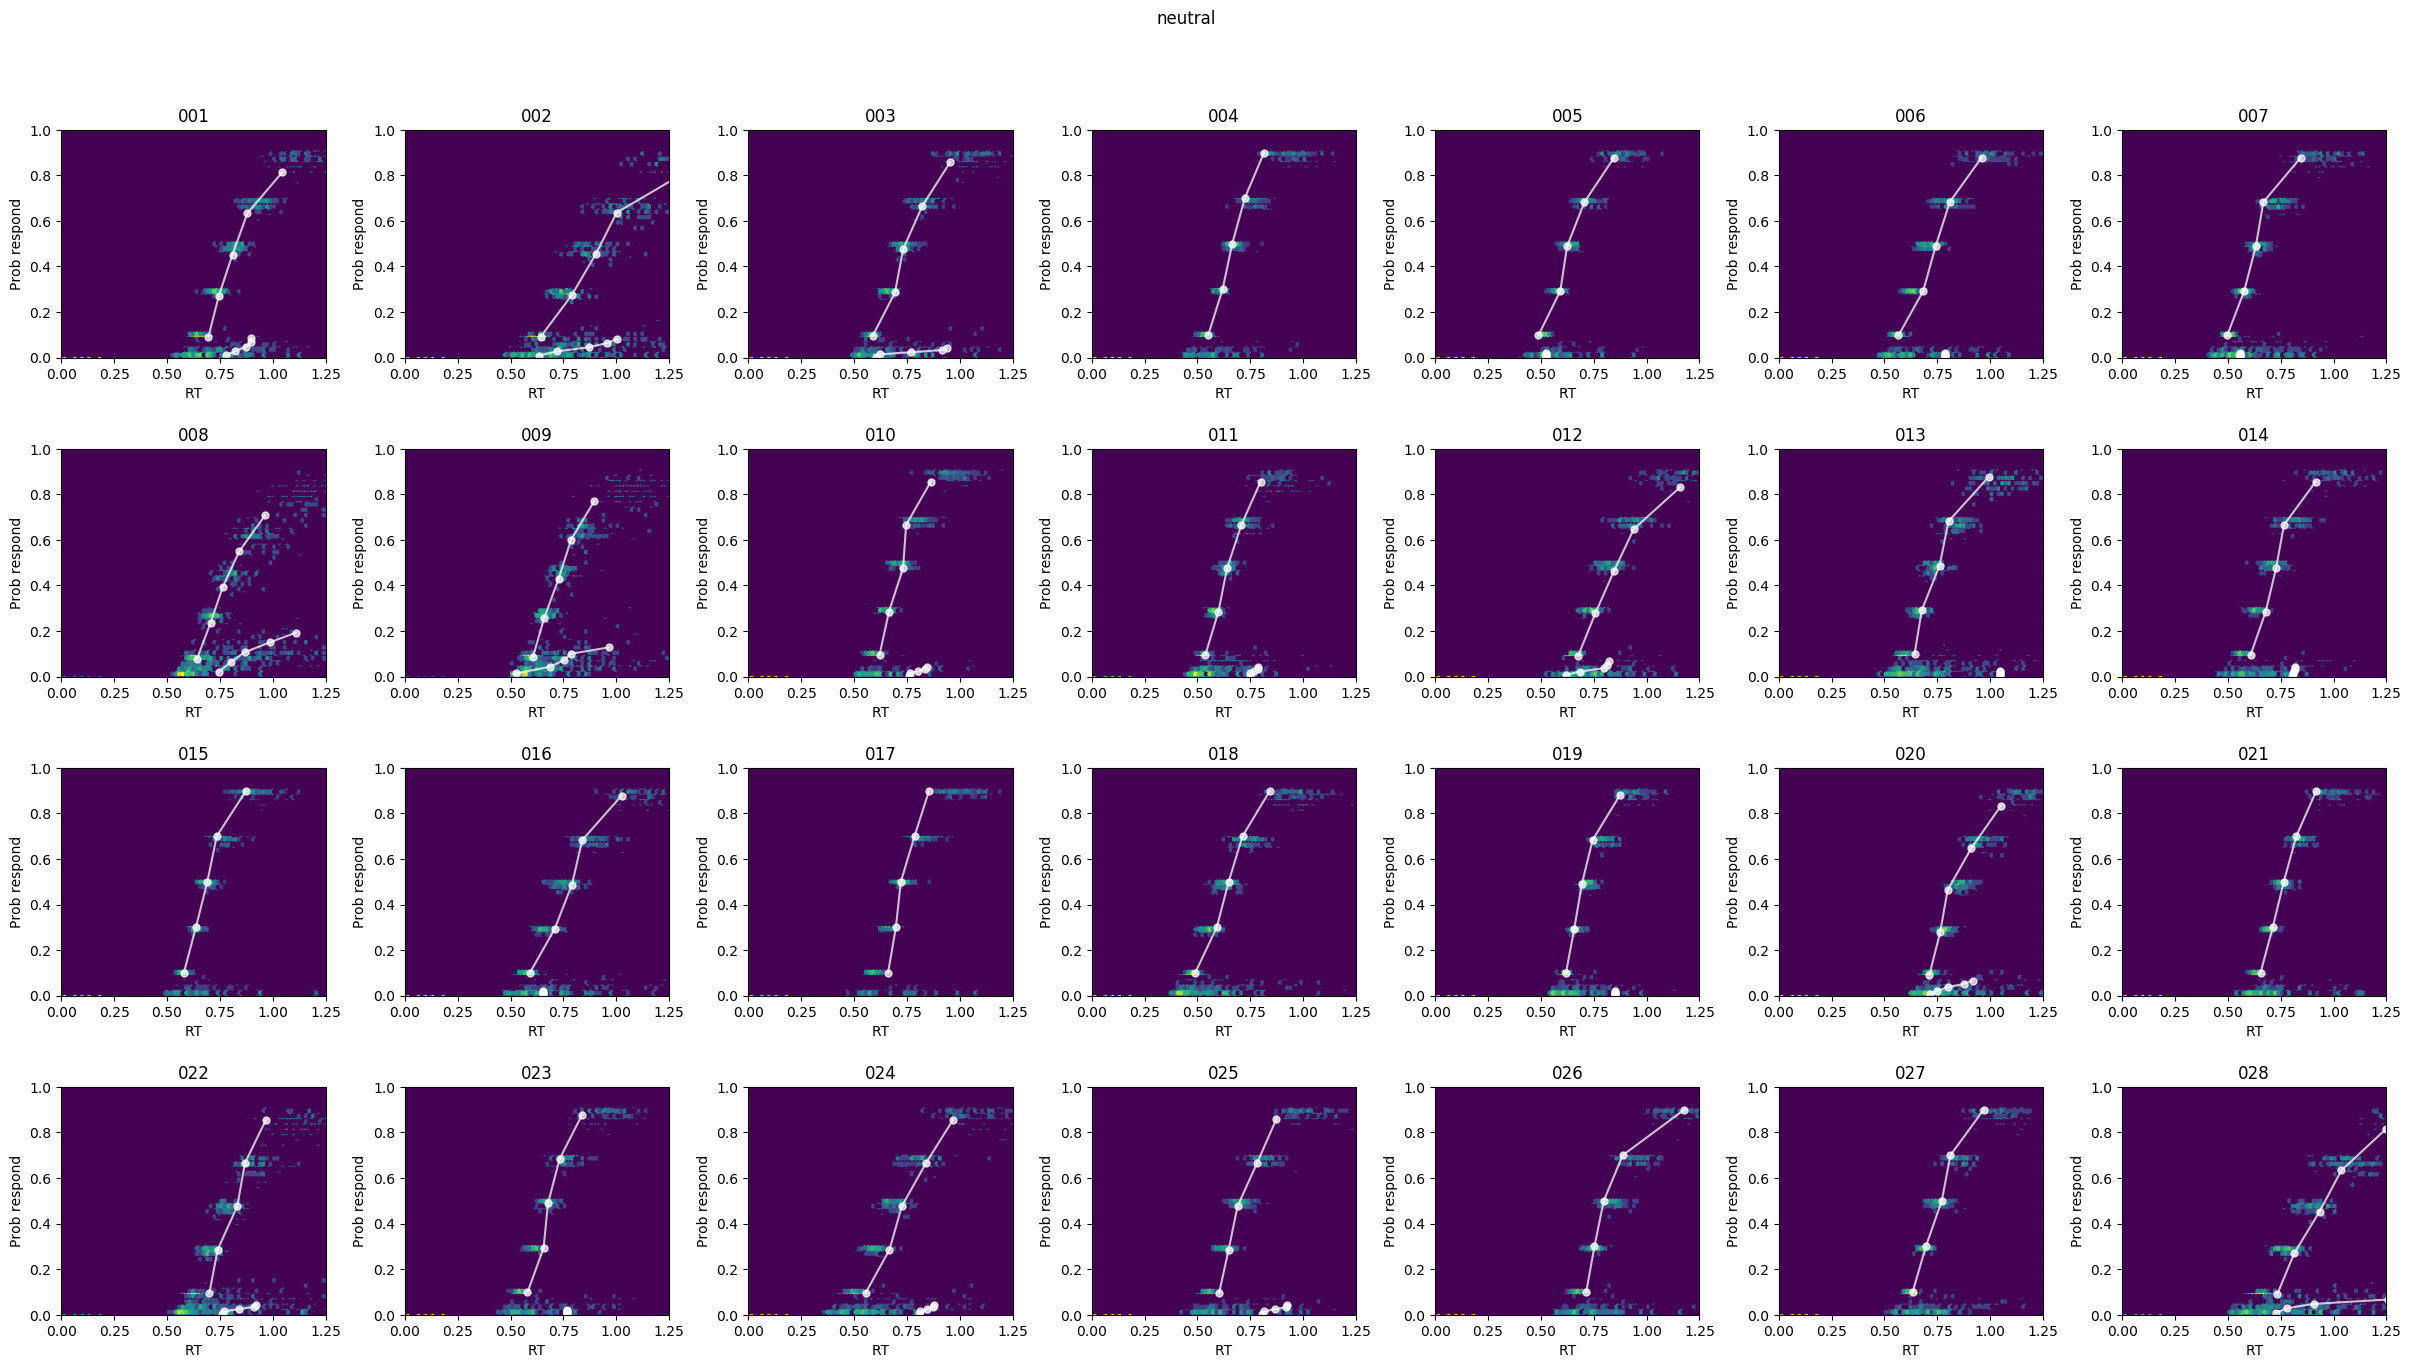

In [18]:
sns.reset_orig()
model.plot_posterior_quantiles(columns=7, figsize=(30, 15), value_range=(0, 1.25), samples=100, hexbin=True, data_plot_kwargs={'markersize':5, 'marker':'o', 'markerfacecolor':'white', 'color':'white', 'alpha':0.75})

In [19]:
subj_nodes = model.get_subj_nodes()
subj_nodes = subj_nodes[subj_nodes.knode_name == 'v_subj']
tmp = subj_nodes[['subj_idx', 'tag', 'node', 'mean']]
# tmp['tag'] = tmp.tag.apply(lambda x: x[0])
tmp.rename(columns={'mean':'drift'})

,subj_idx,tag,node,drift
v_subj.001,001,(),v_subj.001,2.48274
v_subj.002,002,(),v_subj.002,1.84578
v_subj.003,003,(),v_subj.003,2.77779
v_subj.004,004,(),v_subj.004,3.17871
v_subj.005,005,(),v_subj.005,3.17021
v_subj.006,006,(),v_subj.006,2.82822
v_subj.007,007,(),v_subj.007,2.77143
v_subj.008,008,(),v_subj.008,1.83701
v_subj.009,009,(),v_subj.009,2.14238
v_subj.010,010,(),v_subj.010,3.13284


In [20]:
subj_nodes = model.get_subj_nodes()
subj_nodes.knode_name.unique()

array(['a_subj', 'v_subj', 't_subj', 'z_subj_trans'], dtype=object)

In [21]:
tmp

,subj_idx,tag,node,mean
v_subj.001,001,(),v_subj.001,2.48274
v_subj.002,002,(),v_subj.002,1.84578
v_subj.003,003,(),v_subj.003,2.77779
v_subj.004,004,(),v_subj.004,3.17871
v_subj.005,005,(),v_subj.005,3.17021
v_subj.006,006,(),v_subj.006,2.82822
v_subj.007,007,(),v_subj.007,2.77143
v_subj.008,008,(),v_subj.008,1.83701
v_subj.009,009,(),v_subj.009,2.14238
v_subj.010,010,(),v_subj.010,3.13284


In [22]:
subj_nodes = model.get_subj_nodes()
subj_nodes = subj_nodes[subj_nodes.knode_name == 'z_subj_trans']
tmp = subj_nodes[['subj_idx', 'tag', 'node', 'mean']]
tmp['mean'] = tmp.node.apply(lambda x: x.trace[:].mean())
tmp['tag'] = tmp.tag.apply(lambda x: x[0])
# tmp.rename(columns={'mean':'z'})

/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
tmp.to_csv('stroop.csv')

In [24]:

tmp

,subj_idx,tag,node,mean
z_subj_trans(congruent).001,001,congruent,z_subj_trans(congruent).001,-0.152184
z_subj_trans(congruent).002,002,congruent,z_subj_trans(congruent).002,-0.158906
z_subj_trans(congruent).003,003,congruent,z_subj_trans(congruent).003,-0.149798
z_subj_trans(congruent).004,004,congruent,z_subj_trans(congruent).004,-0.149758
z_subj_trans(congruent).005,005,congruent,z_subj_trans(congruent).005,-0.150893
z_subj_trans(congruent).006,006,congruent,z_subj_trans(congruent).006,-0.161464
z_subj_trans(congruent).007,007,congruent,z_subj_trans(congruent).007,-0.145487
z_subj_trans(congruent).008,008,congruent,z_subj_trans(congruent).008,-0.158622
z_subj_trans(congruent).009,009,congruent,z_subj_trans(congruent).009,-0.145792
z_subj_trans(congruent).010,010,congruent,z_subj_trans(congruent).010,-0.152671
